## Random Forest Regression Model 


# We have tried to make future Sales Forecasting based on Random Forest Regression Model

In [63]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
datafile_name= "../Data/Data/cleaned_data2_csv.csv"
abt = pd.read_csv(datafile_name, index_col=0)

In [65]:
abt.columns

Index(['Country', 'City', 'Customer Name', 'Order ID', 'Postal Code', 'Region',
       'Row ID', 'State', 'Top N Customer Label', 'Order Date', 'Product ID_x',
       'Ship Date', 'Ship Mode', 'Discount', 'Profit', 'Profit Ratio',
       'Quantity', 'Sales', 'Product Name', 'Segment', 'Sub-Category', 'month',
       'Total Sales', 'Discount Amount'],
      dtype='object')

In [66]:
abt = abt.dropna(subset=['Sales', 'Discount', 'Profit', 'Segment', 'Profit Ratio', 'Quantity', 'month','Profit Ratio'])
abt_encoded = pd.get_dummies(abt, columns=['Segment'])  # One-hot encode the 'Segment' column

In [67]:
# Define features (X) and target (y)
X = abt_encoded[['Discount', 'Profit', 'Profit Ratio', 'Quantity', 'month','Profit Ratio','Segment_Consumer', 'Segment_Corporate', 'Segment_Home Office']]
y = abt_encoded['Sales']

In [68]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [70]:
# Predict sales on the test set
y_pred = rf_model.predict(X_test)

In [71]:
# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [72]:
# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared Score (R²): {r2}")

Mean Absolute Error (MAE): 57.22720006200635
Mean Squared Error (MSE): 99998.88665410246
R-Squared Score (R²): 0.7230370690523762


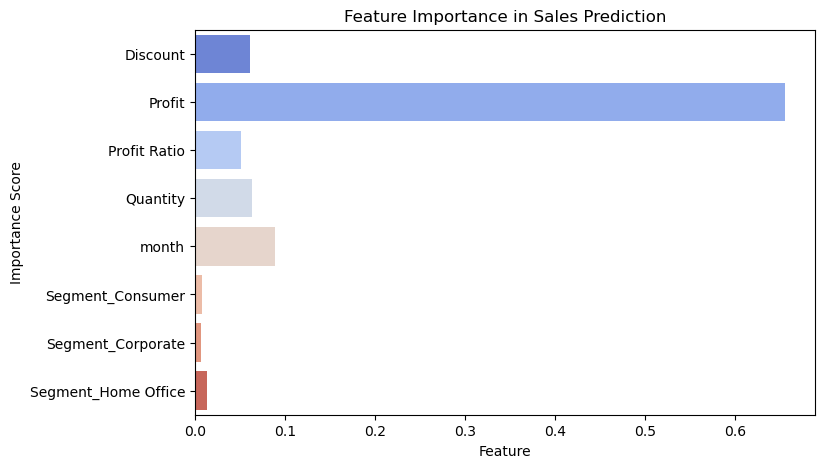

In [73]:
plt.figure(figsize=(8, 5))
sns.barplot(x=rf_model.feature_importances_, y=X.columns, hue=X.columns, palette='coolwarm', dodge=False)
plt.title("Feature Importance in Sales Prediction")
plt.ylabel("Importance Score")
plt.xlabel("Feature")
plt.legend([],[], frameon=False)  # Hide the legend
plt.show()

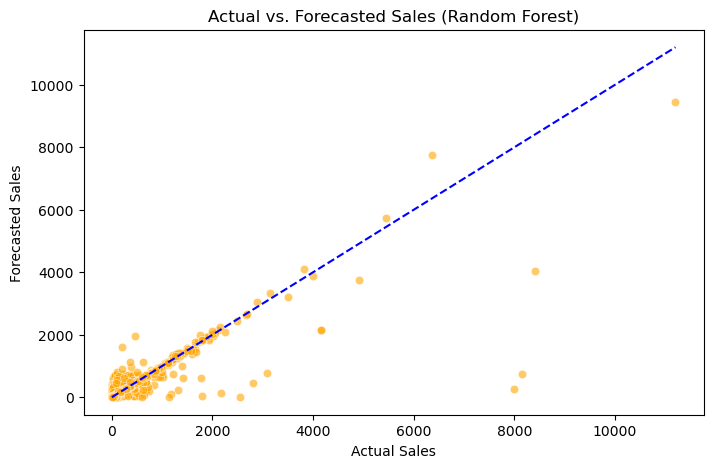

In [100]:
# Visualization: Actual vs. Forecasted Sales
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='orange')
plt.xlabel("Actual Sales")
plt.ylabel("Forecasted Sales")
plt.title("Actual vs. Forecasted Sales (Random Forest)")

# Add a line plot for perfect forecasting
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='--')

plt.show()

# Prediction for next 2 months sales and Comparison of Sales for last 2 months and the next 2 months

Predicted Sales for the Next 2 Months: [259.91702000000043, 259.91702000000043]
Last 2 Months Sales: [ 25.248 258.576]
Next 2 Months Predicted Sales: [259.91702000000043, 259.91702000000043]


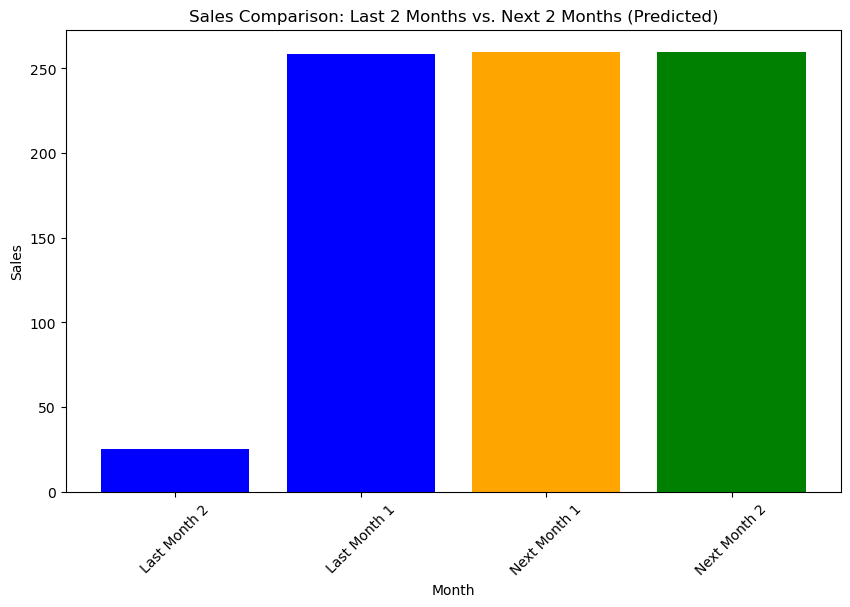

In [77]:

abt['month'] = pd.to_datetime(abt['month'])

# Feature Engineering: Extract month as an integer
abt['month_int'] = abt['month'].dt.month
abt = abt.dropna(subset=['Sales', 'Discount', 'Profit', 'Segment', 'Profit Ratio', 'Quantity', 'month_int'])  # Drop rows with missing values
abt_encoded = pd.get_dummies(abt, columns=['Segment'])  # One-hot encode the 'Segment' column

# Define features and target
features = ['Discount', 'Profit', 'Profit Ratio', 'Quantity', 'month_int', 'Segment_Consumer', 'Segment_Corporate', 'Segment_Home Office']
X = abt_encoded[features]
y = abt_encoded['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict next 2 months' sales
predicted_sales = []
latest_data = abt_encoded[features].iloc[-1].to_frame().T  # Convert to DataFrame and transpose

for _ in range(2):
    
    predicted_sales.append(rf_model.predict(latest_data)[0])
    latest_data['month_int'] = (latest_data['month_int'] % 12) + 1

print(f"Predicted Sales for the Next 2 Months: {predicted_sales}")

# Get last 2 months' sales
last_2_months_sales = abt_encoded['Sales'].iloc[-2:].values

# Print the comparison
print(f"Last 2 Months Sales: {last_2_months_sales}")
print(f"Next 2 Months Predicted Sales: {predicted_sales}")

# Compare and visualize
months = ['Last Month 2', 'Last Month 1', 'Next Month 1', 'Next Month 2']
sales = list(last_2_months_sales) + predicted_sales

plt.figure(figsize=(10, 6))
plt.bar(months, sales, color=['blue', 'blue', 'orange', 'green'])
plt.title("Sales Comparison: Last 2 Months vs. Next 2 Months (Predicted)")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()


# Comparision between Last month sales and Next month sales

Mean Absolute Error (MAE): 55.75901226252621
Mean Squared Error (MSE): 100257.83083830123
R-Squared Score (R²): 0.7223198816655245


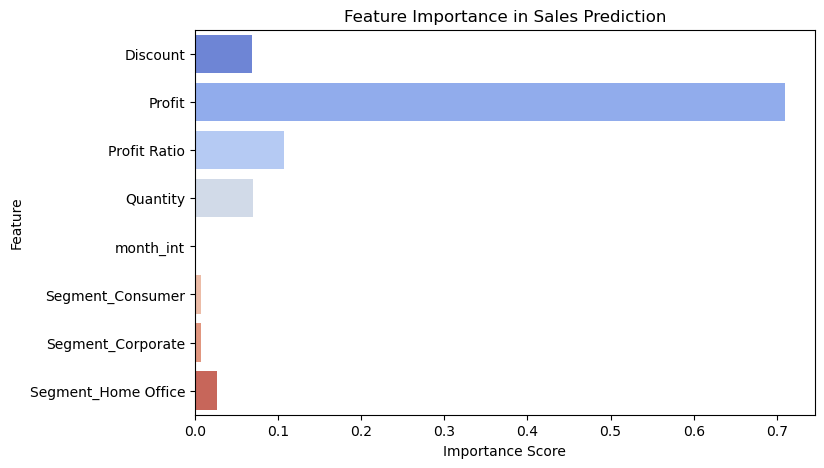

Forecasted Month Sales: 258.576
Forecasted Sales for Next Month: 259.91702000000043
Percentage Change: 0.52%


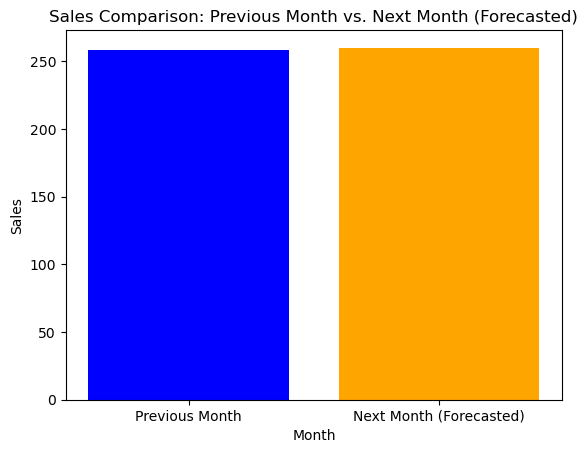

In [105]:

abt['month'] = pd.to_datetime(abt['month'])

# Feature Engineering: Extract month as an integer
abt['month_int'] = abt['month'].dt.month
abt = abt.dropna()  # Drop rows with missing values

# One-hot encode the 'Segment' column
abt_encoded = pd.get_dummies(abt, columns=['Segment'])

# Define features (X) and target (y)
features = ['Discount', 'Profit', 'Profit Ratio', 'Quantity', 'month_int', 'Segment_Consumer', 'Segment_Corporate', 'Segment_Home Office']
X = abt_encoded[features]
y = abt_encoded['Sales']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared Score (R²): {r2}")

plt.figure(figsize=(8, 5))
sns.barplot(x=rf_model.feature_importances_, y=X.columns, hue=X.columns, palette='coolwarm', dodge=False)
plt.title("Feature Importance in Sales Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.legend([],[], frameon=False)  # Hide the legend
plt.show()

# Predict next month's sales
latest_data = abt_encoded[features].iloc[-1].to_frame().T  # Convert to DataFrame and transpose
next_month_sales = rf_model.predict(latest_data)[0]

# Get the previous month's sales
previous_month_sales = abt_encoded['Sales'].iloc[-1]

# Print the comparison
print(f"Forecasted Month Sales: {previous_month_sales}")
print(f"Forecasted Sales for Next Month: {next_month_sales}")

# Calculate the percentage change
percentage_change = ((next_month_sales - previous_month_sales) / previous_month_sales) * 100

# Print the percentage change
print(f"Percentage Change: {percentage_change:.2f}%")

# Visualize the comparison
months = ['Previous Month', 'Next Month (Forecasted)']
sales = [previous_month_sales, next_month_sales]

plt.bar(months, sales, color=['blue', 'orange'])
plt.title("Sales Comparison: Previous Month vs. Next Month (Forecasted)")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()


Mean Absolute Error (MAE): 55.75901226252621
Mean Squared Error (MSE): 100257.83083830123
R-Squared Score (R²): 0.7223198816655245


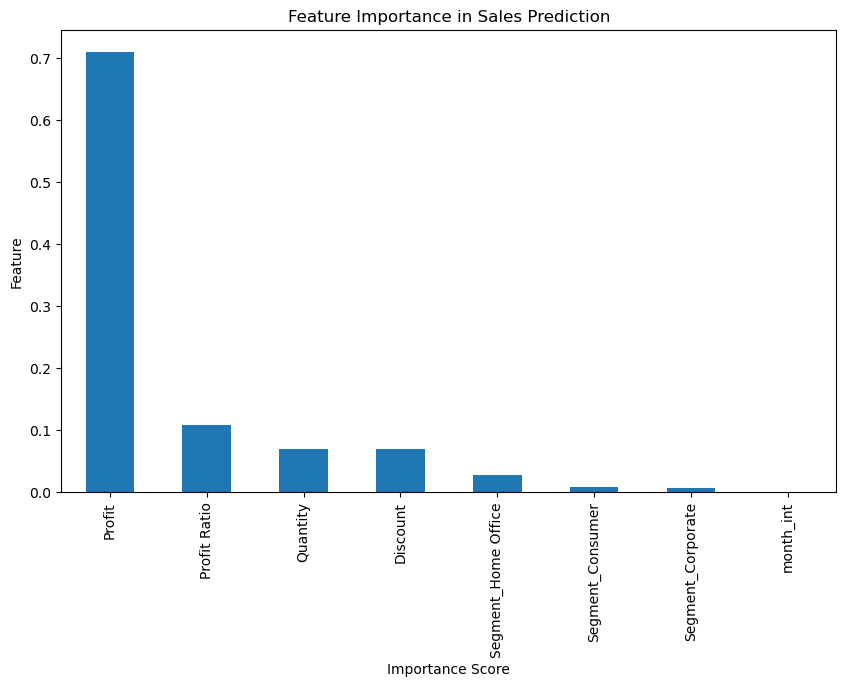

In [107]:
abt['month'] = pd.to_datetime(abt['month'])

# Add external and time-based features
abt['month_int'] = abt['month'].dt.month


# One-hot encode the 'Segment' column
abt_encoded = pd.get_dummies(abt, columns=['Segment'])

# Define features and target
features = ['Discount', 'Profit', 'Profit Ratio', 'Quantity', 'month_int', 'Segment_Consumer', 'Segment_Corporate', 'Segment_Home Office']
X = abt_encoded[features]
y = abt_encoded['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model performance
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared Score (R²): {r2}")

# Visualize feature importances
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)
feature_importances.plot(kind='bar')
plt.title("Feature Importance in Sales Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


Consumer Segment
Previous Month Sales: 258.576
Forecasted Sales for Next Month: 259.91702000000043
Percentage Change: 0.52%

Corporate Segment
Previous Month Sales: 273.568
Forecasted Sales for Next Month: 258.4382400000005
Percentage Change: -5.53%

Home Office Segment
Previous Month Sales: 437.472
Forecasted Sales for Next Month: 258.1465400000004
Percentage Change: -40.99%



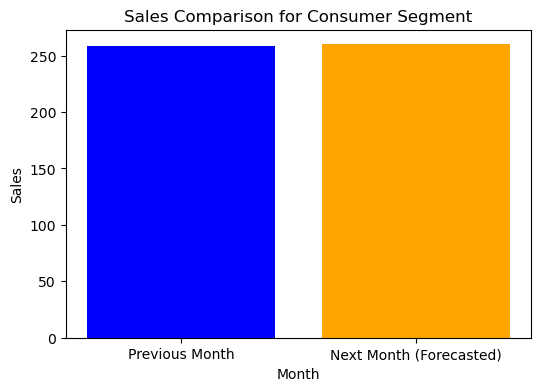

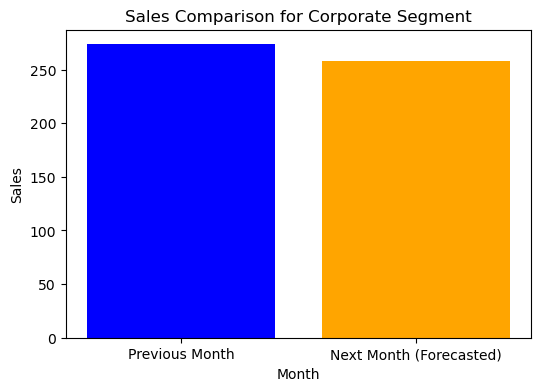

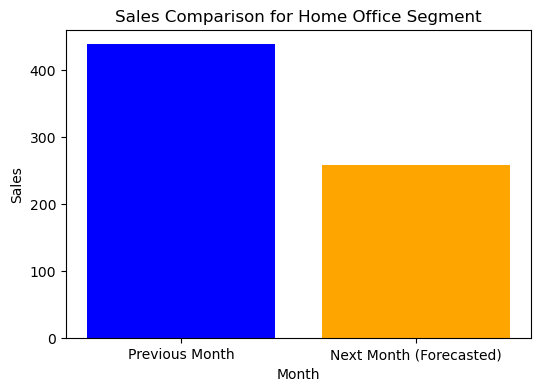

In [113]:
# Convert 'month' column to datetime
abt['month'] = pd.to_datetime(abt['month'])

# Feature Engineering: Extract month as an integer
abt['month_int'] = abt['month'].dt.month
abt = abt.dropna()  # Drop rows with missing values

# One-hot encode the 'Segment' column
abt_encoded = pd.get_dummies(abt, columns=['Segment'])

# Define features (X) and target (y)
features = ['Discount', 'Profit', 'Profit Ratio', 'Quantity', 'month_int', 'Segment_Consumer', 'Segment_Corporate', 'Segment_Home Office']
X = abt_encoded[features]
y = abt_encoded['Sales']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Function to forecast next month's sales for a specific segment
def predict_next_month_sales(segment_name):
    segment_cols = [col for col in abt_encoded.columns if col.startswith('Segment_')]
    latest_data = abt_encoded[features].iloc[-1].to_frame().T  # Convert to DataFrame and transpose
    latest_data[segment_cols] = 0  # Reset all segment columns to 0
    latest_data[f'Segment_{segment_name}'] = 1  # Set the specific segment column to 1
    latest_data['month_int'] += 1  # Increment the month
    if latest_data['month_int'].values[0] > 12:
        latest_data['month_int'] = 1  # Reset month if greater than 12
    next_month_sales = rf_model.predict(latest_data)[0]
    previous_month_sales = abt_encoded[abt_encoded[f'Segment_{segment_name}'] == 1]['Sales'].iloc[-1]
    return previous_month_sales, next_month_sales

# Forecast next month's sales for each segment
segments = ['Consumer', 'Corporate', 'Home Office']
results = {}
for segment in segments:
    prev_sales, next_sales = predict_next_month_sales(segment)
    results[segment] = (prev_sales, next_sales)

# Print the results and compare the sales
for segment, (prev_sales, next_sales) in results.items():
    print(f"{segment} Segment")
    print(f"Previous Month Sales: {prev_sales}")
    print(f"Forecasted Sales for Next Month: {next_sales}")
    percentage_change = ((next_sales - prev_sales) / prev_sales) * 100
    print(f"Percentage Change: {percentage_change:.2f}%\n")

# Visualize the comparison
labels = ['Previous Month', 'Next Month (Forecasted)']
for segment, (prev_sales, next_sales) in results.items():
    sales = [prev_sales, next_sales]
    plt.figure(figsize=(6, 4))
    plt.bar(labels, sales, color=['blue', 'orange'])
    plt.title(f"Sales Comparison for {segment} Segment")
    plt.xlabel("Month")
    plt.ylabel("Sales")
    plt.show()


CONCLUSION: This suggests that our Consumer Segment is going to make profits in coming month but other two segments are not expected to bring good sales. This might help our marketing team to make marketing strategies accordingly to bring more business into other two segments.